# Reflected light geometry
This notebook generates one of the figures in the paper showing the geometry assumed in `starry` when modeling the flux from a planet in reflected light.

In [1]:
%matplotlib inline

In [2]:
%run notebook_setup.py

In [3]:
import numpy as np
import matplotlib.pyplot as plt

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


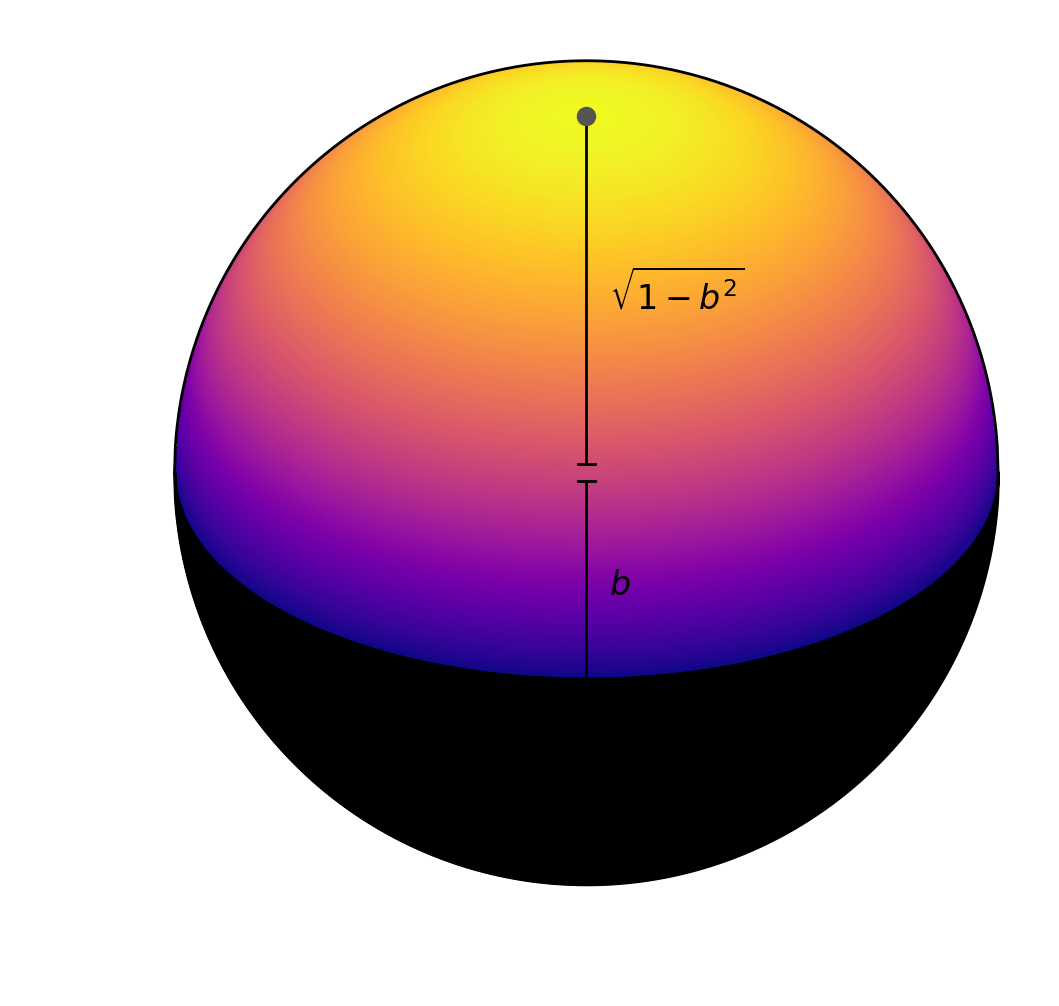

In [99]:
fig, ax = plt.subplots(1, figsize=(6, 6))
ax.set_aspect(1)
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.axis("off")
b = 0.5

# Illumination
x, y = np.meshgrid(np.linspace(-1, 1, 1000), np.linspace(-1, 1, 1000))
z = -np.sqrt(1 - x ** 2 - y ** 2)
I = np.sqrt(1 - b ** 2) * y - b * z
ax.imshow(I, extent=(-1, 1, -1, 1), origin="lower", vmin=0, cmap="plasma")

# Substellar point
ymx = y.flatten()[np.nanargmax(I.flatten())]
ax.plot(0, ymx, marker="o", color="#555555", zorder=10)

# Planet
x = np.linspace(-1, 1, 1000)
yp = np.sqrt(1 - x ** 2)
ax.plot(x, yp, 'k-', lw=1)
ax.plot(x, -yp, 'k-', lw=1)

# Terminator
yt = -b * np.sqrt(1 - x ** 2)
ax.fill_between(x, -yp, yt, color="k");

ax.plot([-0.02, 0.02], [0.02, 0.02], 'k-', lw=1)
ax.plot([-0.02, 0.02], [-0.02, -0.02], 'k-', lw=1)

ax.plot([0, 0], [-0.02, -b], 'k-', lw=1)
ax.annotate(r"$b$", xy=(0.525, 0.375), xycoords="axes fraction", ha="left", va="center", fontsize=12)

ax.plot([0, 0], [0.02, np.sqrt(1 - b ** 2)], 'k-', lw=1)
ax.annotate(r"$\sqrt{1-b^2}$", xy=(0.525, 0.7), xycoords="axes fraction", ha="left", va="center", fontsize=12);

# Save
fig.savefig("../tex/figures/geometry.pdf", bbox_inches="tight")